<a href="https://colab.research.google.com/github/Poorna321288/Internship-assignments-/blob/main/MNIST_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models


In [ ]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

# Normalize and reshape
train_images = train_images.reshape((60000, 28*28)).astype("float32") / 255.0
test_images = test_images.reshape((10000, 28*28)).astype("float32") / 255.0


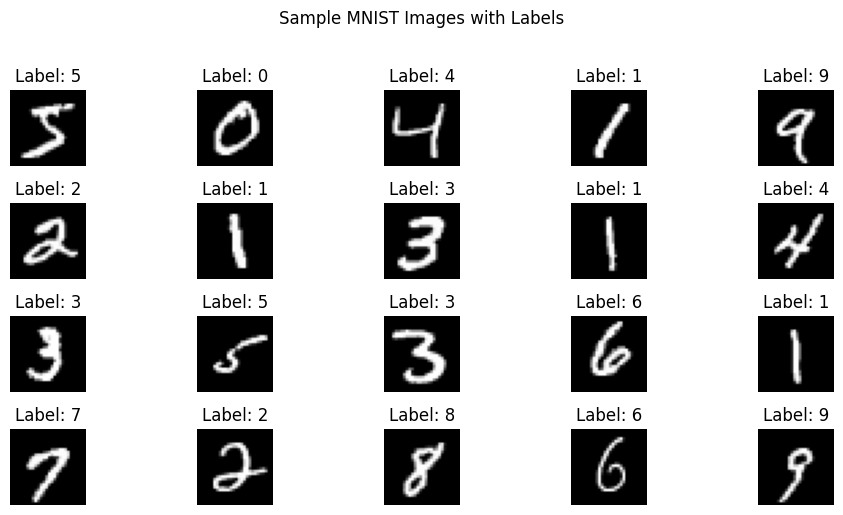

In [ ]:
plt.figure(figsize=(10, 5))
for i in range(20):
    plt.subplot(4, 5, i + 1)
    plt.imshow(train_images[i].reshape(28, 28), cmap='gray')
    plt.title(f"Label: {train_labels[i]}")
    plt.axis('off')
plt.suptitle('Sample MNIST Images with Labels', y=1.02)
plt.tight_layout()
plt.show()


In [ ]:
model = models.Sequential([
    layers.Dense(512, input_shape=(784,)),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Dropout(0.2),

    layers.Dense(256),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Dropout(0.2),

    layers.Dense(10, activation='softmax')
])


In [ ]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [ ]:
history = model.fit(
    train_images, train_labels,
    epochs=15,
    batch_size=128,
    validation_data=(test_images, test_labels),
    verbose=2
)


Epoch 1/15
469/469 - 11s - 24ms/step - accuracy: 0.9316 - loss: 0.2270 - val_accuracy: 0.9666 - val_loss: 0.1061
Epoch 2/15
469/469 - 9s - 18ms/step - accuracy: 0.9683 - loss: 0.1049 - val_accuracy: 0.9737 - val_loss: 0.0782
Epoch 3/15
469/469 - 11s - 23ms/step - accuracy: 0.9758 - loss: 0.0764 - val_accuracy: 0.9776 - val_loss: 0.0696
Epoch 4/15
469/469 - 11s - 23ms/step - accuracy: 0.9806 - loss: 0.0605 - val_accuracy: 0.9787 - val_loss: 0.0691
Epoch 5/15
469/469 - 9s - 20ms/step - accuracy: 0.9844 - loss: 0.0471 - val_accuracy: 0.9788 - val_loss: 0.0669
Epoch 6/15
469/469 - 7s - 16ms/step - accuracy: 0.9854 - loss: 0.0436 - val_accuracy: 0.9808 - val_loss: 0.0604
Epoch 7/15
469/469 - 11s - 24ms/step - accuracy: 0.9873 - loss: 0.0382 - val_accuracy: 0.9800 - val_loss: 0.0647
Epoch 8/15
469/469 - 9s - 19ms/step - accuracy: 0.9895 - loss: 0.0323 - val_accuracy: 0.9814 - val_loss: 0.0589
Epoch 9/15
469/469 - 8s - 16ms/step - accuracy: 0.9897 - loss: 0.0298 - val_accuracy: 0.9819 - val_l

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"\nTest accuracy: {test_acc:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9773 - loss: 0.0822

Test accuracy: 0.9804


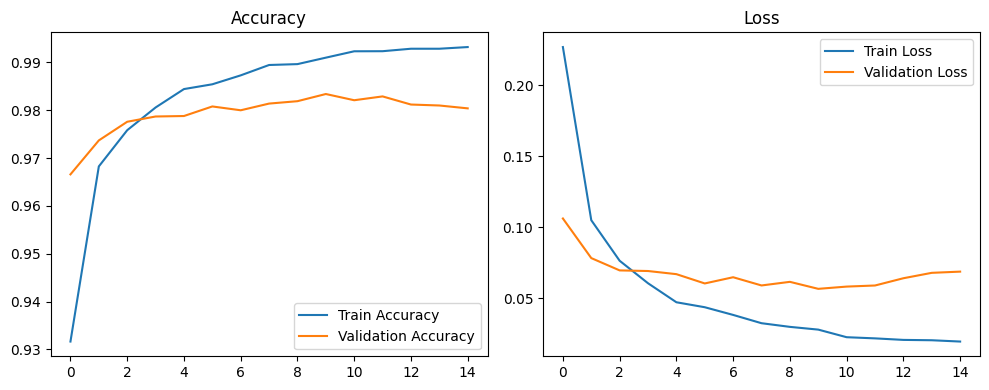

In [ ]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.legend()
plt.tight_layout()
plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


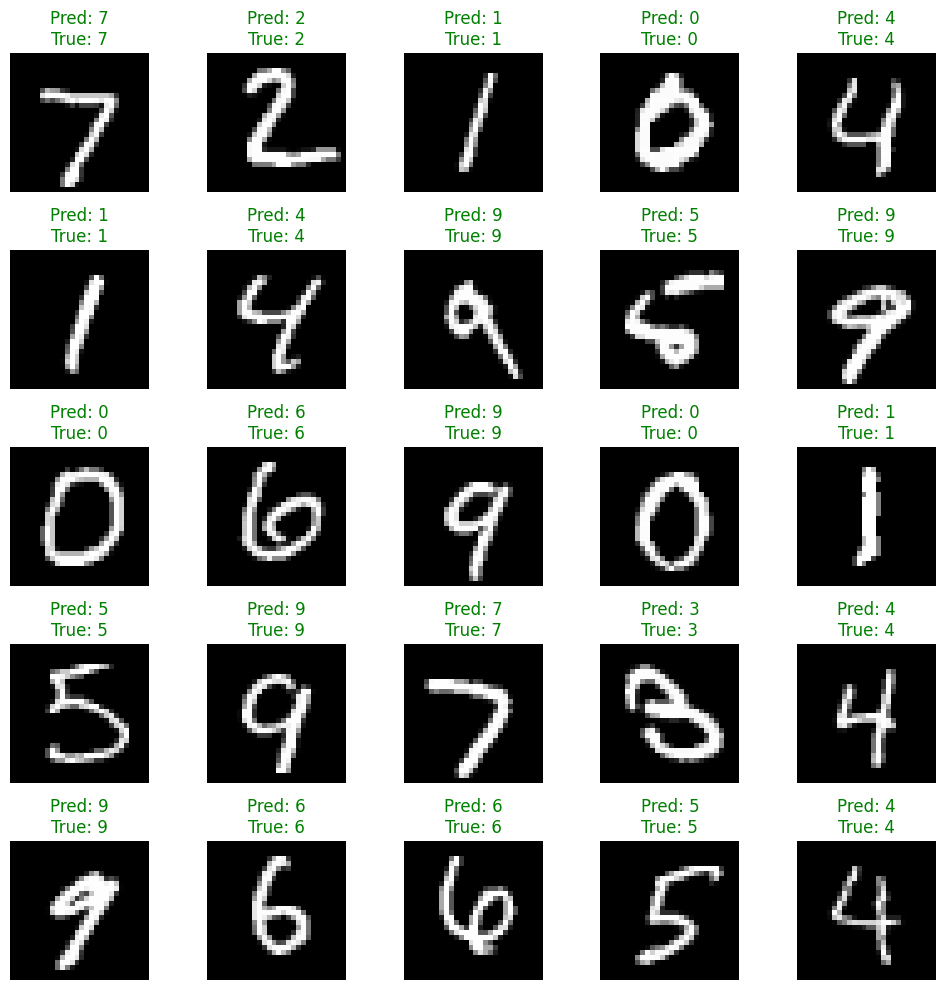

In [ ]:
predictions = model.predict(test_images)
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(test_images[i].reshape(28, 28), cmap='gray')
    pred_label = np.argmax(predictions[i])
    true_label = test_labels[i]
    color = 'green' if pred_label == true_label else 'red'
    plt.title(f"Pred: {pred_label}\nTrue: {true_label}", color=color)
    plt.axis('off')
plt.tight_layout()
plt.show()